In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt



In [7]:
df=pd.read_csv("AirQualityUCI.csv")
df.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [8]:
print(df.shape)
df.head()

(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


#  **Data Cleaning**

In [12]:
# Handling the NULL values
df = df.dropna(axis=1,how="all")
#df.describe()
print(df)

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10-03-2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10-03-2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10-03-2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10-03-2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10-03-2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04-04-2005  10:00:00     3.1       1314.0    -200.0      13.5   
9353  04-04-2005  11:00:00     2.4       1163.0    -200.0      11.4   
9354  04-04-2005  12:00:00     2.4       1142.0    -200.0      12.4   
9355  04-04-2005  13:00:00     2.1       1003.0    -200.0       9.5   
9356  04-04-2005  14:00:00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

In [13]:
features=df
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('PT08.S4(NO2)', axis=1)
print(features)

      CO(GT)  PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        2.6       1360.0     150.0         1046.0    166.0        1056.0   
1        2.0       1292.0     112.0          955.0    103.0        1174.0   
2        2.2       1402.0      88.0          939.0    131.0        1140.0   
3        2.2       1376.0      80.0          948.0    172.0        1092.0   
4        1.6       1272.0      51.0          836.0    131.0        1205.0   
...      ...          ...       ...            ...      ...           ...   
9352     3.1       1314.0    -200.0         1101.0    472.0         539.0   
9353     2.4       1163.0    -200.0         1027.0    353.0         604.0   
9354     2.4       1142.0    -200.0         1063.0    293.0         603.0   
9355     2.1       1003.0    -200.0          961.0    235.0         702.0   
9356     2.2       1071.0    -200.0         1047.0    265.0         654.0   

      NO2(GT)  PT08.S5(O3)     T    RH      AH  
0       113.0       1268.0

In [14]:
labels = df['C6H6(GT)'].values

In [15]:
features = features.values
#print(features)

# **Training and testing**

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.2,random_state=1)

In [17]:
print("X_train shape --> {}".format(xtrain.shape))
print("y_train shape --> {}".format(ytrain.shape))
print("X_test shape --> {}".format(xtest.shape))
print("y_test shape --> {}".format(ytest.shape))

X_train shape --> (7485, 11)
y_train shape --> (7485,)
X_test shape --> (1872, 11)
y_test shape --> (1872,)


# **Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
print("Predicted values:", model.predict(xtest))

Predicted values: [ 5.15419549 -1.20983493  6.21769129 ... 13.85840895 22.54594332
  2.38784341]


In [19]:
y_pred=model.predict(xtest)
y_pred=y_pred.reshape((-1, 1))
print("R^2 score for linear regression: ", model.score(xtest, ytest))

R^2 score for linear regression:  0.999144893172392


In [20]:
mse=mean_squared_error(y_pred,ytest)
print(mse)
rmse = sqrt(mse)
rmse



1.3864549031257432


1.1774781964545005

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error( y_pred, ytest)

0.8146043702103054

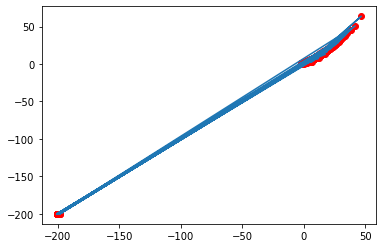

In [22]:
plt.plot(y_pred, ytest)   
plt.scatter(y_pred,ytest,c='red')

# **Support** **Vector** **Machines** 

In [28]:
from sklearn.svm import SVR
from sklearn import svm
#from sklearn.metrics import accuracy_score
model = svm.SVR(kernel='rbf', C=1000)
fittedModel = model.fit(xtrain,ytrain)
predictions = fittedModel.predict(xtest)

In [30]:
print("R^2 score for support vector machines:",fittedModel.score(xtest,predictions))

R^2 score for support vector machines: 1.0


In [32]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.9999962693231039


In [43]:
res = loaded_model.predict([[2.6,
1360.0,
150.0,
1046.0,166.0,1056.0,113.0,1268.0,13.6,48.9,0.7578]])

print(res)

[11.93637979]
